In [1]:
#Setting up the Python environment
%matplotlib inline
import astropy
from astropy.io import fits
import os
import numpy as np
import pylab as plt
plt.rcParams['figure.figsize'] = (10.0, 10.0) # sets the default size for figures
#
home_dir = os.getcwd()+'/'
print ("The Home Directory is set to:", home_dir) # check the home directory

The Home Directory is set to: C:\Users\vince\Documents\Astro Stuff\M2_PES\Stage_SIMO/


In [2]:
#Defining the Plotting Function
def quickplot(input_image, xlo, xhi):
    displo = np.median(input_image)-xlo*np.std(input_image)
    disphi= np.median(input_image)+xhi*np.std(input_image)
    plt.imshow(input_image, cmap='gray',vmin=displo,vmax=disphi)
    
# Defining Function for basic statistics on the images
def quickstats(input_image):
    print ('Min:', np.min(input_image))
    print ('Max:', np.max(input_image))
    print ('Mean:', np.mean(input_image))
    print ('Median:', np.median(input_image))
    print ('Stdev:', np.std(input_image))

# Processing of the Bias Frames

In [4]:
#Opening the bias frames
bias1 = fits.open('./T120/2022-10-25 SIMO/Bias/Bias-0001.fits')
bias2 = fits.open('./T120/2022-10-25 SIMO/Bias/Bias-0002.fits')
bias3 = fits.open('./T120/2022-10-25 SIMO/Bias/Bias-0003.fits')
bias4 = fits.open('./T120/2022-10-25 SIMO/Bias/Bias-0004.fits')
bias5 = fits.open('./T120/2022-10-25 SIMO/Bias/Bias-0005.fits')
bias6 = fits.open('./T120/2022-10-25 SIMO/Bias/Bias-0006.fits')
bias7 = fits.open('./T120/2022-10-25 SIMO/Bias/Bias-0007.fits')
bias8 = fits.open('./T120/2022-10-25 SIMO/Bias/Bias-0008.fits')
bias9 = fits.open('./T120/2022-10-25 SIMO/Bias/Bias-0009.fits')
bias10 = fits.open('./T120/2022-10-25 SIMO/Bias/Bias-0010.fits')

In [5]:
# open the image headers
bias1_h = bias1[0].header
bias2_h = bias2[0].header
bias3_h = bias3[0].header
bias4_h = bias4[0].header
bias5_h = bias5[0].header
bias6_h = bias6[0].header
bias7_h = bias7[0].header
bias8_h = bias8[0].header
bias9_h = bias9[0].header
bias10_h = bias10[0].header
#
# Check the CCD temperature and exposure times
print ('CCD temperature = ', bias1_h['CCD-TEMP'])
print ('CCD temperature = ', bias2_h['CCD-TEMP'])
print ('CCD temperature = ', bias3_h['CCD-TEMP'])
print ('CCD temperature = ', bias4_h['CCD-TEMP'])
print ('CCD temperature = ', bias5_h['CCD-TEMP'])
print ('CCD temperature = ', bias6_h['CCD-TEMP'])
print ('CCD temperature = ', bias7_h['CCD-TEMP'])
print ('CCD temperature = ', bias8_h['CCD-TEMP'])
print ('CCD temperature = ', bias9_h['CCD-TEMP'])
print ('CCD temperature = ', bias10_h['CCD-TEMP'])
#
print ('Exposure time   = ', bias1_h['EXPTIME'])
print ('Exposure time   = ', bias2_h['EXPTIME'])
print ('Exposure time   = ', bias3_h['EXPTIME'])
print ('Exposure time   = ', bias4_h['EXPTIME'])
print ('Exposure time   = ', bias5_h['EXPTIME'])
print ('Exposure time   = ', bias6_h['EXPTIME'])
print ('Exposure time   = ', bias7_h['EXPTIME'])
print ('Exposure time   = ', bias8_h['EXPTIME'])
print ('Exposure time   = ', bias9_h['EXPTIME'])
print ('Exposure time   = ', bias10_h['EXPTIME'])
#
# read the image data and convert from integer to floating point
bias1_d = 1.0*(bias1[0].data)
bias2_d = 1.0*(bias2[0].data)
bias3_d = 1.0*(bias3[0].data)
bias4_d = 1.0*(bias4[0].data)
bias5_d = 1.0*(bias5[0].data)
bias6_d = 1.0*(bias6[0].data)
bias7_d = 1.0*(bias7[0].data)
bias8_d = 1.0*(bias8[0].data)
bias9_d = 1.0*(bias9[0].data)
bias10_d = 1.0*(bias10[0].data)
#
# find the means
print ('Means:')
print (bias1_d.mean())
print (bias2_d.mean())
print (bias3_d.mean())
print (bias4_d.mean())
print (bias5_d.mean())
print (bias6_d.mean())
print (bias7_d.mean())
print (bias8_d.mean())
print (bias9_d.mean())
print (bias10_d.mean())
# 
# and close the files
bias1.close()
bias2.close()
bias3.close()
bias4.close()
bias5.close()
bias6.close()
bias7.close()
bias8.close()
bias9.close()
bias10.close()

CCD temperature =  -59.777000427246094
CCD temperature =  -59.777000427246094
CCD temperature =  -59.777000427246094
CCD temperature =  -59.777000427246094
CCD temperature =  -59.777000427246094
CCD temperature =  -59.777000427246094
CCD temperature =  -59.777000427246094
CCD temperature =  -59.777000427246094
CCD temperature =  -59.777000427246094
CCD temperature =  -59.777000427246094
Exposure time   =  0.0
Exposure time   =  0.0
Exposure time   =  0.0
Exposure time   =  0.0
Exposure time   =  0.0
Exposure time   =  0.0
Exposure time   =  0.0
Exposure time   =  0.0
Exposure time   =  0.0
Exposure time   =  0.0
Means:
299.45244884490967
298.4367275238037
299.4456901550293
299.3956174850464
299.3968629837036
300.4084806442261
299.3352460861206
298.4117660522461
300.2805976867676
300.3466501235962


In [6]:
#taking the mean bias
master_bias = 0.1*(bias1_d + bias2_d + bias3_d + bias4_d + bias5_d + bias6_d + bias7_d + bias8_d + bias9_d + bias10_d)

In [2]:
#Plotting and checking the result
def quickplot(input_image, xlo, xhi):
    displo = np.median(input_image)-xlo*np.std(input_image)
    disphi= np.median(input_image)+xhi*np.std(input_image)
    plt.imshow(input_image, cmap='gray',vmin=displo,vmax=disphi)


#quickplot(master_bias, 2, 2)

# Processing of the Dark Frames

In [9]:
# Open the Darks
dark90_1 = fits.open('./T120/2022-10-25 SIMO/Dark/Dark-0001_90s.fits')
dark90_2 = fits.open('./T120/2022-10-25 SIMO/Dark/Dark-0002_90s.fits')
dark90_3 = fits.open('./T120/2022-10-25 SIMO/Dark/Dark-0003_90s.fits')
dark180_1 = fits.open('./T120/2022-10-25 SIMO/Dark/Dark-0001_180s.fits')
dark180_2 = fits.open('./T120/2022-10-25 SIMO/Dark/Dark-0002_180s.fits')
dark180_3 = fits.open('./T120/2022-10-25 SIMO/Dark/Dark-0003_180s.fits')
dark240_1 = fits.open('./T120/2022-10-25 SIMO/Dark/Dark-0001_240s.fits')
dark240_2 = fits.open('./T120/2022-10-25 SIMO/Dark/Dark-0002_240s.fits')
dark240_3 = fits.open('./T120/2022-10-25 SIMO/Dark/Dark-0003_240s.fits')
dark300_1 = fits.open('./T120/2022-10-25 SIMO/Dark/Dark-0001_300s.fits')
dark300_2 = fits.open('./T120/2022-10-25 SIMO/Dark/Dark-0002_300s.fits')
dark300_3 = fits.open('./T120/2022-10-25 SIMO/Dark/Dark-0003_300s.fits')
#
# read the headers
dark90_1h = dark90_1[0].header
dark90_2h = dark90_2[0].header
dark90_3h = dark90_3[0].header
dark180_1h = dark180_1[0].header
dark180_2h = dark180_2[0].header
dark180_3h = dark180_3[0].header
dark240_1h = dark240_1[0].header
dark240_2h = dark240_2[0].header
dark240_3h = dark240_3[0].header
dark300_1h = dark300_1[0].header
dark300_2h = dark300_2[0].header
dark300_3h = dark300_3[0].header
#
# check the temperatures and times
print ('CCD temperature = ', dark90_1h['CCD-TEMP'])
print ('CCD temperature = ', dark90_2h['CCD-TEMP'])
print ('CCD temperature = ', dark90_3h['CCD-TEMP'])
print ('CCD temperature = ', dark180_1h['CCD-TEMP'])
print ('CCD temperature = ', dark180_2h['CCD-TEMP'])
print ('CCD temperature = ', dark180_3h['CCD-TEMP'])
print ('CCD temperature = ', dark240_1h['CCD-TEMP'])
print ('CCD temperature = ', dark240_2h['CCD-TEMP'])
print ('CCD temperature = ', dark240_3h['CCD-TEMP'])
print ('CCD temperature = ', dark300_1h['CCD-TEMP'])
print ('CCD temperature = ', dark300_2h['CCD-TEMP'])
print ('CCD temperature = ', dark300_3h['CCD-TEMP'])
#
print ('Exposure time   = ', dark90_1h['EXPTIME'])
print ('Exposure time   = ', dark90_2h['EXPTIME'])
print ('Exposure time   = ', dark90_3h['EXPTIME'])
print ('Exposure time   = ', dark180_1h['EXPTIME'])
print ('Exposure time   = ', dark180_2h['EXPTIME'])
print ('Exposure time   = ', dark180_3h['EXPTIME'])
print ('Exposure time   = ', dark240_1h['EXPTIME'])
print ('Exposure time   = ', dark240_2h['EXPTIME'])
print ('Exposure time   = ', dark240_3h['EXPTIME'])
print ('Exposure time   = ', dark300_1h['EXPTIME'])
print ('Exposure time   = ', dark300_2h['EXPTIME'])
print ('Exposure time   = ', dark300_3h['EXPTIME'])
#
# read the data and convert to floating point values
dark90_1d = dark90_1[0].data * 1.0
dark90_2d = dark90_2[0].data * 1.0
dark90_3d = dark90_3[0].data * 1.0
dark180_1d = dark180_1[0].data * 1.0
dark180_2d = dark180_2[0].data * 1.0
dark180_3d = dark180_3[0].data * 1.0
dark240_1d = dark240_1[0].data * 1.0
dark240_2d = dark240_2[0].data * 1.0
dark240_3d = dark240_3[0].data * 1.0
dark300_1d = dark300_1[0].data * 1.0
dark300_2d = dark300_2[0].data * 1.0
dark300_3d = dark300_3[0].data * 1.0
#
# close the files
dark90_1.close()
dark90_2.close()
dark90_3.close()
dark180_1.close()
dark180_2.close()
dark180_3.close()
dark240_1.close()
dark240_2.close()
dark240_3.close()
dark300_1.close()
dark300_2.close()
dark300_3.close()

CCD temperature =  -59.12799835205078
CCD temperature =  -60.42599868774414
CCD temperature =  -59.12799835205078
CCD temperature =  -59.777000427246094
CCD temperature =  -59.777000427246094
CCD temperature =  -59.777000427246094
CCD temperature =  -59.12799835205078
CCD temperature =  -59.777000427246094
CCD temperature =  -59.12799835205078
CCD temperature =  -60.42599868774414
CCD temperature =  -59.12799835205078
CCD temperature =  -60.42599868774414
Exposure time   =  90.0
Exposure time   =  90.0
Exposure time   =  90.0
Exposure time   =  180.0
Exposure time   =  180.0
Exposure time   =  180.0
Exposure time   =  240.0
Exposure time   =  240.0
Exposure time   =  240.0
Exposure time   =  300.0
Exposure time   =  300.0
Exposure time   =  300.0


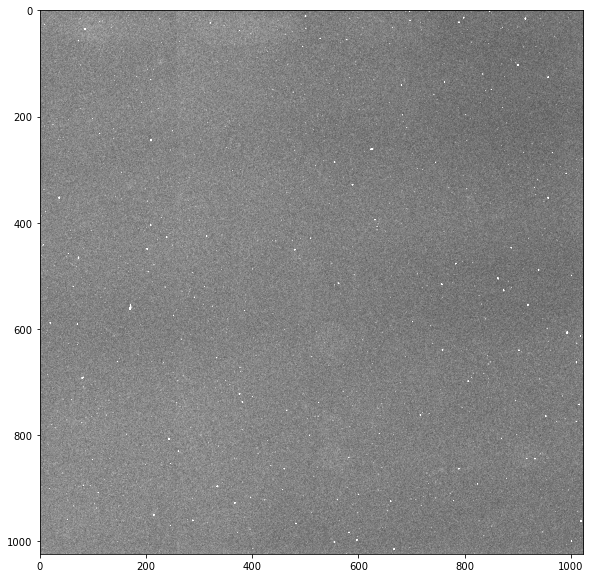

In [34]:
#checking the darks
quickplot(dark300_1d, 3, 3)

Two of the 300s Darks had a cosmic ray, so we will remove them for our final darks

In [32]:
#taking the mean darks for each exposure time, and subtracting the bias frame
master_dark_90 = (dark90_1d + dark90_2d + dark90_3d) / 3  - master_bias
master_dark_180 = (dark180_1d + dark180_2d + dark180_3d) / 3 - master_bias
master_dark_240 = (dark240_1d + dark240_2d + dark240_3d) / 3 - master_bias
master_dark_300 =  dark300_2d - master_bias

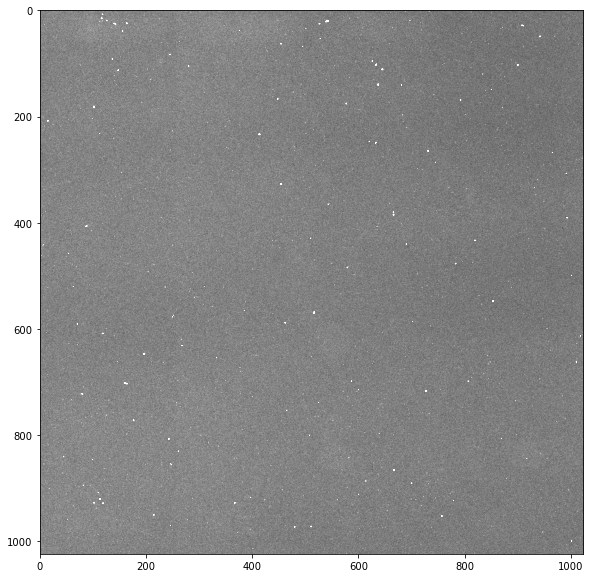

In [33]:
#checking the result
quickplot(master_dark_300, 3, 3)

# Processing of the Flat Frames

In [36]:
#opening the Flat Frames in each filter
Flat1_R = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0001_R.fits')
Flat2_R = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0002_R.fits')
Flat3_R = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0003_R.fits')
Flat4_R = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0004_R.fits')
Flat5_R = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0005_R.fits')

Flat1_V = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0001_V.fits')
Flat2_V = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0002_V.fits')
Flat3_V = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0003_V.fits')
Flat4_V = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0004_V.fits')
Flat5_V = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0005_V.fits')

Flat1_B = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0001_B.fits')
Flat2_B = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0002_B.fits')
Flat3_B = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0003_B.fits')
Flat4_B = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0004_B.fits')
Flat5_B = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0005_B.fits')

Flat1_Ha = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0001_Ha.fits')
Flat2_Ha = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0002_Ha.fits')
Flat3_Ha = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0003_Ha.fits')
Flat4_Ha = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0004_Ha.fits')
Flat5_Ha = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0005_Ha.fits')

Flat1_O = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0001_O.fits')
Flat2_O = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0002_O.fits')
Flat3_O = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0003_O.fits')
Flat4_O = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0004_O.fits')
Flat5_O = fits.open('./T120/2022-10-25 SIMO/Flat/Flat-0005_O.fits')

In [37]:
#get the Fits Headers
Flat1_R_h = Flat1_R[0].header
Flat2_R_h = Flat2_R[0].header
Flat3_R_h = Flat3_R[0].header
Flat4_R_h = Flat4_R[0].header
Flat5_R_h = Flat5_R[0].header

Flat1_V_h = Flat1_V[0].header
Flat2_V_h = Flat2_V[0].header
Flat3_V_h = Flat3_V[0].header
Flat4_V_h = Flat4_V[0].header
Flat5_V_h = Flat5_V[0].header

Flat1_B_h = Flat1_B[0].header
Flat2_B_h = Flat2_B[0].header
Flat3_B_h = Flat3_B[0].header
Flat4_B_h = Flat4_B[0].header
Flat5_B_h = Flat5_B[0].header

Flat1_O_h = Flat1_O[0].header
Flat2_O_h = Flat2_O[0].header
Flat3_O_h = Flat3_O[0].header
Flat4_O_h = Flat4_O[0].header
Flat5_O_h = Flat5_O[0].header

Flat1_Ha_h = Flat1_Ha[0].header
Flat2_Ha_h = Flat2_Ha[0].header
Flat3_Ha_h = Flat3_Ha[0].header
Flat4_Ha_h = Flat4_Ha[0].header
Flat5_Ha_h = Flat5_Ha[0].header

#Check the Filters, exposure times and CCD Temperatures
print ('Filter: ', Flat1_R_h['FILTER'] ,'; CCD Temp = ', Flat1_R_h['CCD-TEMP'], '; Exposure time   = ', Flat1_R_h['EXPTIME'])
print ('Filter: ', Flat2_R_h['FILTER'] ,'; CCD Temp = ', Flat2_R_h['CCD-TEMP'], '; Exposure time   = ', Flat2_R_h['EXPTIME'])
print ('Filter: ', Flat3_R_h['FILTER'] ,'; CCD Temp = ', Flat3_R_h['CCD-TEMP'], '; Exposure time   = ', Flat3_R_h['EXPTIME'])
print ('Filter: ', Flat4_R_h['FILTER'] ,'; CCD Temp = ', Flat4_R_h['CCD-TEMP'], '; Exposure time   = ', Flat4_R_h['EXPTIME'])
print ('Filter: ', Flat5_R_h['FILTER'] ,'; CCD Temp = ', Flat5_R_h['CCD-TEMP'], '; Exposure time   = ', Flat5_R_h['EXPTIME'])

print ('Filter: ', Flat1_V_h['FILTER'] ,'; CCD Temp = ', Flat1_V_h['CCD-TEMP'], '; Exposure time   = ', Flat1_V_h['EXPTIME'])
print ('Filter: ', Flat2_V_h['FILTER'] ,'; CCD Temp = ', Flat2_V_h['CCD-TEMP'], '; Exposure time   = ', Flat2_V_h['EXPTIME'])
print ('Filter: ', Flat3_V_h['FILTER'] ,'; CCD Temp = ', Flat3_V_h['CCD-TEMP'], '; Exposure time   = ', Flat3_V_h['EXPTIME'])
print ('Filter: ', Flat4_V_h['FILTER'] ,'; CCD Temp = ', Flat4_V_h['CCD-TEMP'], '; Exposure time   = ', Flat4_V_h['EXPTIME'])
print ('Filter: ', Flat5_V_h['FILTER'] ,'; CCD Temp = ', Flat5_V_h['CCD-TEMP'], '; Exposure time   = ', Flat5_V_h['EXPTIME'])

print ('Filter: ', Flat1_B_h['FILTER'] ,'; CCD Temp = ', Flat1_B_h['CCD-TEMP'], '; Exposure time   = ', Flat1_B_h['EXPTIME'])
print ('Filter: ', Flat2_B_h['FILTER'] ,'; CCD Temp = ', Flat2_B_h['CCD-TEMP'], '; Exposure time   = ', Flat2_B_h['EXPTIME'])
print ('Filter: ', Flat3_B_h['FILTER'] ,'; CCD Temp = ', Flat3_B_h['CCD-TEMP'], '; Exposure time   = ', Flat3_B_h['EXPTIME'])
print ('Filter: ', Flat4_B_h['FILTER'] ,'; CCD Temp = ', Flat4_B_h['CCD-TEMP'], '; Exposure time   = ', Flat4_B_h['EXPTIME'])
print ('Filter: ', Flat5_B_h['FILTER'] ,'; CCD Temp = ', Flat5_B_h['CCD-TEMP'], '; Exposure time   = ', Flat5_B_h['EXPTIME'])

print ('Filter: ', Flat1_O_h['FILTER'] ,'; CCD Temp = ', Flat1_O_h['CCD-TEMP'], '; Exposure time   = ', Flat1_O_h['EXPTIME'])
print ('Filter: ', Flat2_O_h['FILTER'] ,'; CCD Temp = ', Flat2_O_h['CCD-TEMP'], '; Exposure time   = ', Flat2_O_h['EXPTIME'])
print ('Filter: ', Flat3_O_h['FILTER'] ,'; CCD Temp = ', Flat3_O_h['CCD-TEMP'], '; Exposure time   = ', Flat3_O_h['EXPTIME'])
print ('Filter: ', Flat4_O_h['FILTER'] ,'; CCD Temp = ', Flat4_O_h['CCD-TEMP'], '; Exposure time   = ', Flat4_O_h['EXPTIME'])
print ('Filter: ', Flat5_O_h['FILTER'] ,'; CCD Temp = ', Flat5_O_h['CCD-TEMP'], '; Exposure time   = ', Flat5_O_h['EXPTIME'])

print ('Filter: ', Flat1_Ha_h['FILTER'] ,'; CCD Temp = ', Flat1_Ha_h['CCD-TEMP'], '; Exposure time   = ', Flat1_Ha_h['EXPTIME'])
print ('Filter: ', Flat2_Ha_h['FILTER'] ,'; CCD Temp = ', Flat2_Ha_h['CCD-TEMP'], '; Exposure time   = ', Flat2_Ha_h['EXPTIME'])
print ('Filter: ', Flat3_Ha_h['FILTER'] ,'; CCD Temp = ', Flat3_Ha_h['CCD-TEMP'], '; Exposure time   = ', Flat3_Ha_h['EXPTIME'])
print ('Filter: ', Flat4_Ha_h['FILTER'] ,'; CCD Temp = ', Flat4_Ha_h['CCD-TEMP'], '; Exposure time   = ', Flat4_Ha_h['EXPTIME'])
print ('Filter: ', Flat5_Ha_h['FILTER'] ,'; CCD Temp = ', Flat5_Ha_h['CCD-TEMP'], '; Exposure time   = ', Flat5_Ha_h['EXPTIME'])

Filter:  R_Cousins ; CCD Temp =  -59.12799835205078 ; Exposure time   =  0.3
Filter:  R_Cousins ; CCD Temp =  -60.42599868774414 ; Exposure time   =  0.3
Filter:  R_Cousins ; CCD Temp =  -59.12799835205078 ; Exposure time   =  0.3
Filter:  R_Cousins ; CCD Temp =  -59.777000427246094 ; Exposure time   =  0.3
Filter:  R_Cousins ; CCD Temp =  -59.12799835205078 ; Exposure time   =  0.3
Filter:  V_cousins ; CCD Temp =  -59.12799835205078 ; Exposure time   =  0.5
Filter:  V_cousins ; CCD Temp =  -60.42599868774414 ; Exposure time   =  0.5
Filter:  V_cousins ; CCD Temp =  -59.12799835205078 ; Exposure time   =  0.5
Filter:  V_cousins ; CCD Temp =  -60.42599868774414 ; Exposure time   =  0.5
Filter:  V_cousins ; CCD Temp =  -59.12799835205078 ; Exposure time   =  0.5
Filter:  B_cousins ; CCD Temp =  -59.12799835205078 ; Exposure time   =  4.0
Filter:  B_cousins ; CCD Temp =  -60.42599868774414 ; Exposure time   =  4.0
Filter:  B_cousins ; CCD Temp =  -59.12799835205078 ; Exposure time   =  4.

In [38]:
# read the data and convert to floating point values
Flat1_R_d = Flat1_R[0].data * 1.0
Flat2_R_d = Flat2_R[0].data * 1.0
Flat3_R_d = Flat3_R[0].data * 1.0
Flat4_R_d = Flat4_R[0].data * 1.0
Flat5_R_d = Flat5_R[0].data * 1.0

Flat1_V_d = Flat1_V[0].data * 1.0
Flat2_V_d = Flat2_V[0].data * 1.0
Flat3_V_d = Flat3_V[0].data * 1.0
Flat4_V_d = Flat4_V[0].data * 1.0
Flat5_V_d = Flat5_V[0].data * 1.0

Flat1_B_d = Flat1_B[0].data * 1.0
Flat2_B_d = Flat2_B[0].data * 1.0
Flat3_B_d = Flat3_B[0].data * 1.0
Flat4_B_d = Flat4_B[0].data * 1.0
Flat5_B_d = Flat5_B[0].data * 1.0

Flat1_O_d = Flat1_O[0].data * 1.0
Flat2_O_d = Flat2_O[0].data * 1.0
Flat3_O_d = Flat3_O[0].data * 1.0
Flat4_O_d = Flat4_O[0].data * 1.0
Flat5_O_d = Flat5_O[0].data * 1.0

Flat1_Ha_d = Flat1_Ha[0].data * 1.0
Flat2_Ha_d = Flat2_Ha[0].data * 1.0
Flat3_Ha_d = Flat3_Ha[0].data * 1.0
Flat4_Ha_d = Flat4_Ha[0].data * 1.0
Flat5_Ha_d = Flat5_Ha[0].data * 1.0

#close the files
Flat1_R.close()
Flat2_R.close()
Flat3_R.close()
Flat4_R.close()
Flat5_R.close()

Flat1_V.close()
Flat2_V.close()
Flat3_V.close()
Flat4_V.close()
Flat5_V.close()

Flat1_B.close()
Flat2_B.close()
Flat3_B.close()
Flat4_B.close()
Flat5_B.close()

Flat1_O.close()
Flat2_O.close()
Flat3_O.close()
Flat4_O.close()
Flat5_O.close()

Flat1_Ha.close()
Flat2_Ha.close()
Flat3_Ha.close()
Flat4_Ha.close()
Flat5_Ha.close()

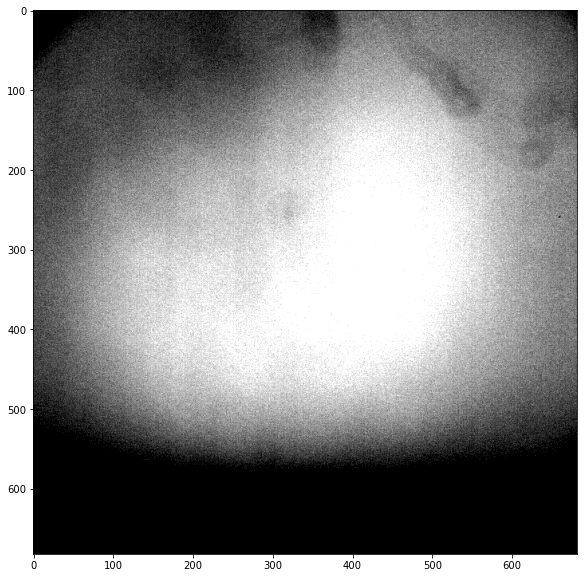

In [76]:
#checking the flats
quickplot(Flat2_Ha_d, 0.5, 0.5)

In [75]:
print('Xbin: ', Flat1_O_h['XBINNING'], '; Ybin: ', Flat1_O_h['YBINNING'])

Xbin:  2 ; Ybin:  2


In [84]:
Flat1_Ha_d.shape

(682, 682)

The Ha flat is in bin 3 so we change it to a bin 2 by adding extra rows/columns of pixels between each pixel, taking the average in the pixels either side. We will some contrast in the image by increasing the resolution, but this shouldnt be too bad as it is only a flat (Ideally another flat would be obtained in bin2).

In [110]:
Flat_Ha_d = (Flat1_Ha_d + Flat2_Ha_d + Flat3_Ha_d + Flat4_Ha_d + Flat5_Ha_d) / 5
Flat_Ha_bin2 = np.zeros([1024, 1024])
h = 0
i = 0
while i < 681 :
    j = 0
    k = 0
    while j < 681:
        Flat_Ha_bin2[h, k] = Flat_Ha_d[i, j]
        Flat_Ha_bin2[h+1, k] = (Flat_Ha_d[i, j]+Flat_Ha_d[i+1, j])/2
        Flat_Ha_bin2[h+2, k] = Flat_Ha_d[i+1, j]
        Flat_Ha_bin2[h, k+1] = (Flat_Ha_d[i, j] + Flat_Ha_d[i, j+1])/2
        Flat_Ha_bin2[h, k+2] = Flat_Ha_d[i, j+1]
        Flat_Ha_bin2[h+1, k+1] = (Flat_Ha_d[i, j] + Flat_Ha_d[i, j+1] + Flat_Ha_d[i+1, j] + Flat_Ha_d[i+1, j+1]) /4
        Flat_Ha_bin2[h+2, k+1] = (Flat_Ha_d[i+1, j+1] + Flat_Ha_d[i, j+1]) /2
        Flat_Ha_bin2[h+1, k+2] = (Flat_Ha_d[i, j+1]+Flat_Ha_d[i+1, j+1])/2
        Flat_Ha_bin2[h+2, k+2] = Flat_Ha_d[i+1, j+1]
        k +=3
        j += 2
    h += 3
    i += 2
i=0
while i<1023:
    Flat_Ha_bin2[i, 1023] = Flat_Ha_bin2[i, 1022]
    Flat_Ha_bin2[1023, i] = Flat_Ha_bin2[1022, i]
    i+=1

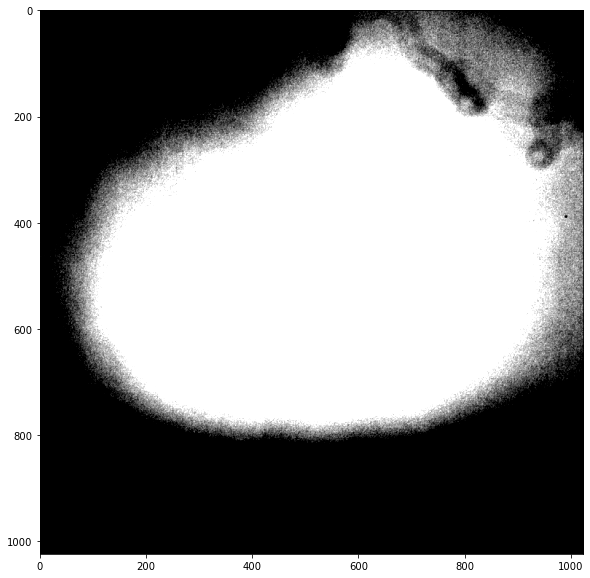

In [111]:
quickplot(Flat_Ha_bin2, 0.1, 0.1)

In [69]:
#Taking mean flats for each filter, subtracting the bias and scaled dark frames
ScaleR = Flat1_R_h['EXPTIME'] / dark90_1h['EXPTIME']
master_Flat_R = (Flat1_R_d + Flat2_R_d + Flat3_R_d + Flat4_R_d + Flat5_R_d) / 5 - master_bias - master_dark_90 * ScaleR

ScaleV = Flat1_V_h['EXPTIME'] / dark90_1h['EXPTIME']
master_Flat_V = (Flat1_V_d + Flat2_V_d + Flat3_V_d + Flat4_V_d + Flat5_V_d) / 5 - master_bias - master_dark_90 * ScaleV

ScaleB = Flat1_B_h['EXPTIME'] / dark90_1h['EXPTIME']
master_Flat_B = (Flat1_B_d + Flat2_B_d + Flat3_B_d + Flat4_B_d + Flat5_B_d) / 5 - master_bias - master_dark_90 * ScaleB

ScaleO = Flat1_O_h['EXPTIME'] / dark90_1h['EXPTIME']
master_Flat_O = (Flat1_O_d + Flat2_O_d + Flat3_O_d + Flat4_O_d + Flat5_O_d) / 5 - master_bias - master_dark_90 * ScaleO


In [112]:
ScaleHa = Flat1_Ha_h['EXPTIME'] / dark90_1h['EXPTIME']
master_Flat_Ha = Flat_Ha_bin2 - master_bias - master_dark_90 * ScaleHa

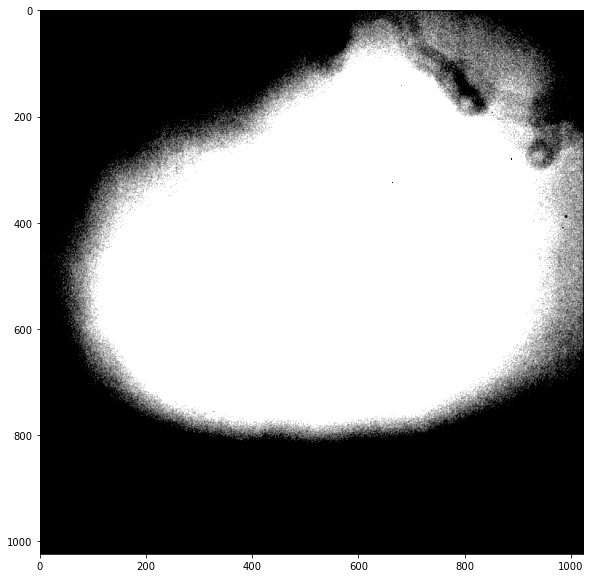

In [113]:
#checking the result
quickplot(master_Flat_Ha, 0.1, 0.1)

# Saving the Calibration Frames

In [106]:
#Saving Bias
bias = fits.PrimaryHDU(master_bias, bias1[0].header)
bias.writeto('./T120/master_bias.fits')

In [107]:
#Saving Flats
flat_Ha = fits.PrimaryHDU(master_Flat_Ha, Flat1_Ha[0].header)
flat_Ha.writeto('./T120/Flat_Ha.fits')

flat_R = fits.PrimaryHDU(master_Flat_R, Flat1_R[0].header)
flat_R.writeto('./T120/Flat_R.fits')

flat_V = fits.PrimaryHDU(master_Flat_V, Flat1_V[0].header)
flat_V.writeto('./T120/Flat_V.fits')

flat_B = fits.PrimaryHDU(master_Flat_B, Flat1_B[0].header)
flat_B.writeto('./T120/Flat_B.fits')

flat_O = fits.PrimaryHDU(master_Flat_O, Flat1_O[0].header)
flat_O.writeto('./T120/Flat_O.fits')

In [108]:
#Saving Darks
Dark_90s = fits.PrimaryHDU(master_dark_90, dark90_1[0].header)
Dark_90s.writeto('./T120/2022-10-25 SIMO/Dark_90s.fits')

Dark_180s = fits.PrimaryHDU(master_dark_180, dark180_1[0].header)
Dark_180s.writeto('./T120/2022-10-25 SIMO/Dark_180s.fits')

Dark_240s = fits.PrimaryHDU(master_dark_240, dark240_1[0].header)
Dark_240s.writeto('./T120/2022-10-25 SIMO/Dark_240s.fits')

Dark_300s = fits.PrimaryHDU(master_dark_300, dark300_1[0].header)
Dark_300s.writeto('./T120/2022-10-25 SIMO/Dark_300s.fits')

# Dark and bias for T80

In [3]:
dark_1 = fits.open('./T80/SIMO_day2/dark_1s.fits')
dark_1_head = dark_1[0].header
dark_1_data = (dark_1[0].data) * 1.0
dark_1.close()

dark_240 = fits.open('./T80/SIMO_day2/dark_240s.fit')
dark_240_head = dark_240[0].header
dark_240_data = (dark_240[0].data) * 1.0
dark_240.close()

dark_4 = fits.open('./T80/SIMO_day1/dark_4sec.fits')
dark_4_head = dark_4[0].header
dark_4_data = (dark_4[0].data) * 1.0
dark_4.close()

dark_300 = fits.open('./T80/SIMO_day2/dark_300s.fit')
dark_300_head = dark_300[0].header
dark_300_data = (dark_300[0].data) * 1.0
dark_300.close()

dark_60 = fits.open('./T80/SIMO_day2/dark_60s.fit')
dark_60_head = dark_60[0].header
dark_60_data = (dark_60[0].data) * 1.0
dark_60.close()

dark_20 = fits.open('./T80/SIMO_day2/dark_20s.fit')
dark_20_head = dark_20[0].header
dark_20_data = (dark_20[0].data) * 1.0
dark_20.close()

In [32]:
dark_300_data.shape

(1023, 1536)

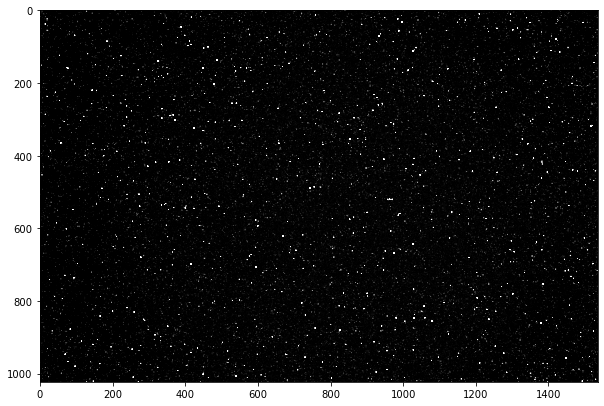

In [4]:
quickplot(dark_300_data, 0, 1)

In [5]:
flat_R = fits.open('./T80/SIMO_day2/flat_r_bin2.fit')
flat_R_header = flat_R[0].header
flat_R_data = flat_R[0].data
flat_R.close()

flat_G = fits.open('./T80/SIMO_day2/flat_g_bin_2.fit')
flat_G_header = flat_G[0].header
flat_G_data = flat_G[0].data
flat_G.close()

flat_I = fits.open('./T80/SIMO_day2/Flat-0001_i.fit')
flat_I_header = flat_I[0].header
flat_I_data = flat_I[0].data
flat_I.close()

flat_Z = fits.open('./T80/SIMO_day2/flat_z_bin_2.fit')
flat_Z_header = flat_Z[0].header
flat_Z_data = flat_Z[0].data
flat_Z.close()

flat_Ha = fits.open('./T80/SIMO_day2/flat_h_alpha_bin_2.fit')
flat_Ha_header = flat_Ha[0].header
flat_Ha_data = flat_Ha[0].data
flat_Ha.close()

In [41]:
delta_dark = np.absolute(dark_60_data - dark_20_data)
bias_data = dark_20_data - delta_dark * 0.5
bias_data = np.where(bias_data>0, bias_data, 0)

In [60]:
quickstats(dark_300s_bs)

Min: -1969.5
Max: 33248.0
Mean: 42.535136839666826
Median: 38.5
Stdev: 185.7603071046617


In [14]:
#dark_1s_bs = dark_1_data - bias_data
dark_4s_bs = dark_4_data - bias_data
dark_4s_bs = np.where(dark_4s_bs>0, dark_4s_bs, 0)

dark_20s_bs = dark_20_data - bias_data
dark_20s_bs = np.where(dark_20s_bs>0, dark_20s_bs, 0)

dark_60s_bs = dark_60_data - bias_data
dark_60s_bs = np.where(dark_60s_bs>0, dark_60s_bs, 0)

dark_300s_bs = dark_300_data - bias_data
dark_300s_bs = np.where(dark_300s_bs>0, dark_300s_bs, 0)

flat_R_db = flat_R_data - bias_data - dark_20s_bs * flat_R_header['EXPTIME'] / dark_20_head['EXPTIME']
flat_R_db = np.where(flat_R_db>0, flat_R_db, flat_R_data)
flat_R_norm = flat_R_db / np.median(flat_R_db)

flat_G_db = flat_G_data - bias_data - dark_20s_bs * flat_G_header['EXPTIME'] / dark_20_head['EXPTIME']
flat_G_db = np.where(flat_G_db>0, flat_G_db, flat_G_data)
flat_G_norm = flat_G_db / np.median(flat_G_db)

flat_Z_db = flat_Z_data - bias_data - dark_20s_bs * flat_Z_header['EXPTIME'] / dark_20_head['EXPTIME']
flat_Z_db = np.where(flat_Z_db>0, flat_Z_db, flat_Z_data)
flat_Z_norm = flat_Z_db / np.median(flat_Z_db)

#flat_I_db = flat_I_data - bias_data - dark_60s_bs * flat_I_header['EXPTIME'] / dark_60_head['EXPTIME']
#flat_I_norm = flat_I_db / np.median(flat_I_db)

flat_Ha_db = flat_Ha_data - bias_data - dark_20s_bs * flat_Ha_header['EXPTIME'] / dark_20_head['EXPTIME']
flat_Ha_db = np.where(flat_Ha_db>0, flat_Ha_db, flat_Ha_data)
flat_Ha_norm = flat_Ha_db / np.median(flat_Ha_db)

In [16]:
bias = fits.PrimaryHDU(bias_data)
bias.writeto('./T80/calib/bias.fits')

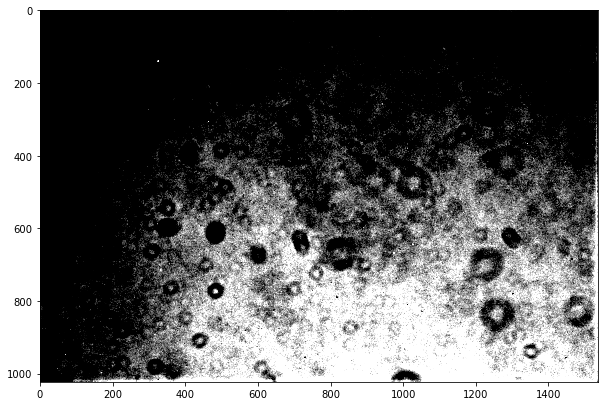

In [15]:
quickplot(flat_R_norm, 0, 1)

In [17]:
dark4 = fits.PrimaryHDU(dark_4s_bs)
dark4.writeto('./T80/calib/dark_4s.fits')

dark20 = fits.PrimaryHDU(dark_20s_bs)
dark20.writeto('./T80/calib/dark_20s.fits')

dark60 = fits.PrimaryHDU(dark_60s_bs)
dark60.writeto('./T80/calib/dark_60s.fits')

dark300 = fits.PrimaryHDU(dark_300s_bs)
dark300.writeto('./T80/calib/dark_300s.fits')

In [18]:
flat_R = fits.PrimaryHDU(flat_R_norm)
flat_R.writeto('./T80/calib/Flat_R.fits')

flat_G = fits.PrimaryHDU(flat_G_norm)
flat_G.writeto('./T80/calib/Flat_G.fits')

flat_Z = fits.PrimaryHDU(flat_Z_norm)
flat_Z.writeto('./T80/calib/Flat_Z.fits')

#flat_I = fits.PrimaryHDU(flat_I_norm)
#flat_I.writeto('./T80/calib/Flat_I.fits')

flat_Ha = fits.PrimaryHDU(flat_Ha_norm)
flat_Ha.writeto('./T80/calib/Flat_Ha.fits')

In [23]:
quickstats(dark_300s_bs)

Min: 0.0
Max: 33252.0
Mean: 418.97075149173185
Median: 416.0
Stdev: 187.64321858432226


In [66]:
dark_300_data.shape

(1023, 1536)

In [6]:
dark_240_bin2 = np.zeros([1023, 1536])
dark_1_bin2 = np.zeros([1023, 1536])
i = 0
while i<=1022:
    j = 0
    while j<=1535:
        dark_240_bin2[i,j] = (dark_240_data[2*i, 2*j] + dark_240_data[2*i+1, 2*j] + dark_240_data[2*i, 2*j+1] + dark_240_data[2*i+1, 2*j+1]) / 4
        dark_1_bin2[i,j] = (dark_1_data[2*i, 2*j] + dark_1_data[2*i+1, 2*j] + dark_1_data[2*i, 2*j+1] + dark_1_data[2*i+1, 2*j+1]) / 4
        j += 1
    i+=1



    


In [7]:
for i in range(0,1535):
    dark_1_bin2[1022,i] = dark_1_data[1022, i]
    dark_240_bin2[1022,i] = dark_240_data[1022, i]

In [8]:
dark_240_bin2[1022,1535] = dark_240_data[1022, 1535]

In [9]:
dark_only_60 = np.absolute((dark_300_data / np.max(dark_300_data) - dark_240_bin2 / np.max(dark_240_bin2)))*np.max(dark_300_data)

In [10]:
dark_only_60 = np.round(dark_only_60)

In [11]:
quickstats(dark_only_60)

Min: 0.0
Max: 32096.0
Mean: 419.50067967986314
Median: 419.0
Stdev: 147.59947148591098


In [12]:
bias_data = np.where((dark_60_data - dark_only_60)>0, dark_60_data - dark_only_60, 0)

In [ ]:
dark1 = fits.PrimaryHDU(dark_1s_bs)
dark1.writeto('./T80/dark_1s.fits')

dark240 = fits.PrimaryHDU(dark_240s_bs)
dark240.writeto('./T80/dark_240s.fits')

In [13]:
quickstats(bias_data)

Min: 0.0
Max: 33225.0
Mean: 296.741935483871
Median: 295.0
Stdev: 45.50708738280285


In [26]:
dark_240s_bs = dark_240_bin2 - bias_data
dark_240s_bs = np.where(dark_240s_bs>0, dark_240s_bs, 0)

In [28]:
dark240 = fits.PrimaryHDU(dark_240_bin2)
dark240.writeto('./T80/calib/dark_nbs_240s.fits')

In [35]:
flat_R_db2 = flat_R_data #- dark_240_bin2 * flat_R_header['EXPTIME'] / 240
flat_R_norm2 = flat_R_db2 / np.median(flat_R_db2)

flat_G_db2 = flat_G_data #- dark_240_bin2 * flat_G_header['EXPTIME'] / 240
flat_G_norm2 = flat_G_db2 / np.median(flat_G_db2)

flat_Ha_db2 = flat_Ha_data #- dark_240_bin2 * flat_Ha_header['EXPTIME'] / 240
flat_Ha_norm2 = flat_Ha_db2 / np.median(flat_Ha_db2)

In [39]:
quickstats(flat_R_norm2)

Min: 0.7827802274309584
Max: 4.834300301694128
Mean: 0.9996661603469565
Median: 1.0
Stdev: 0.01708311427089853


In [40]:
flat_R2 = fits.PrimaryHDU(flat_R_norm2)
flat_R2.writeto('./T80/calib/Flat2_R.fits')

flat_G2 = fits.PrimaryHDU(flat_G_norm2)
flat_G2.writeto('./T80/calib/Flat2_G.fits')

flat_Ha2 = fits.PrimaryHDU(flat_Ha_norm2)
flat_Ha2.writeto('./T80/calib/Flat2_Ha.fits')